In [42]:
# -*- coding: utf-8 -*-
# カーネル法を使った関数推定

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 推定対象のサンプル点を作る関数
# 乱数で適当に散らばらせる
def test_function(x):
    sigma = 1
    mu = 0
    disturbance = 0
    strength_diturbance = 1 / 40
    if hasattr(x, 'size'):
        disturbance = np.random.randn(x.size) / sigma * strength_diturbance
    else:
        disturbance = np.random.randn() / sigma * strength_diturbance
    return 1/ np.sqrt(2 * np.pi) / sigma * np.exp(-np.power((x - mu), 2) / (2 * np.power(sigma, 2))) - x / 20 + disturbance    



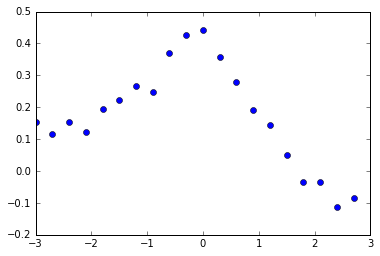

In [36]:
# サンプル点をプロット
x_sample = np.arange(-3, 3, 0.3)
y_sample = test_function(x_sample)
plt.plot(x_sample, y_sample, "o")
plt.show()

In [37]:
# ガウシアンカーネル
def kernel_gauss(x, x_sample, beta):
    # 配列に適用できるように小細工
    if hasattr(x_sample, 'size') and x_sample.size > 1:
        z = x_sample[:, np.newaxis]
        return beta * np.exp(-np.power(x - z, 2))
    else:
        return beta * np.exp(-np.power(x - x_sample, 2))

In [38]:
class Kernel:
    def __init__(self, x_sample, kernel_function):
        '''
        x_sample : MxN matrix, M is number of sample, N is dimension of x
        今回はM = 20, N = 1
        '''
        self.x_sample = x_sample
        self.kernel_function = kernel_function
        
    def __call__(self, x):
        return self.kernel_function(x, self.x_sample)
        
    def gram_matrix(self):
        n = self.x_sample.size
        gram = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i, n):
                value = self.kernel_function(\
                    self.x_sample[i], 
                    self.x_sample[j])
                gram[i, j] = value
                gram[j, i] = value
        return gram

In [39]:
# ガウシアンカーネルの半径betaを設定、ラムダ式でに引数関数にする
# 初めから__call__メソッドを持たせたクラスにしてもよかったかも
beta = 1
kernel_function = lambda x, y: kernel_gauss(x, y, beta)
# カーネルのオブジェクト生成、グラム行列の計算
kernel = Kernel(x_sample, kernel_function)
gram_matrix = kernel.gram_matrix()
# 正則化パラメータを設定
lamb = 0.01
lamb = lamb * np.identity(x_sample.size)

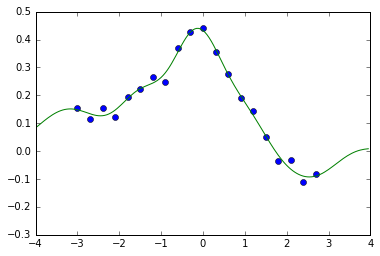

In [40]:
# 正則化項付きの係数計算
alpha = np.dot(np.linalg.inv(gram_matrix + lamb), y_sample)
# 推定した関数をプロット
x = np.arange(-4, 4, 0.05)
y = np.dot(alpha.T, kernel(x))
plt.plot(x_sample, y_sample, 'o')
plt.plot(x, y)
plt.ylim([-0.3, 0.5])
plt.show()

In [41]:
%whos

Variable          Type        Data/Info
---------------------------------------
Kernel            type        <class '__main__.Kernel'>
alpha             ndarray     20: 20 elems, type `float64`, 160 bytes
beta              int         1
gram_matrix       ndarray     20x20: 400 elems, type `float64`, 3200 bytes
kernel            Kernel      <__main__.Kernel object at 0x000000000774B630>
kernel_function   function    <function <lambda> at 0x00000000076B2048>
kernel_gauss      function    <function kernel_gauss at 0x000000000751CEA0>
lamb              ndarray     20x20: 400 elems, type `float64`, 3200 bytes
np                module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt               module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
test_function     function    <function test_function at 0x0000000004369A60>
x                 ndarray     160: 160 elems, type `float64`, 1280 bytes
x_sample          ndarray     20: 20 elems, type `float64`, 160 b